# King County Housing 

Business Problem: Real Estate Investment Firm 

columns to avoid according to project intro
- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat 
- long
- sqft_living15
- sqft_lot 15


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor 

In [2]:
#reading in dataframe
kc_house = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])

In [3]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
#dropping columns that I don't believe are necessary
kc_house.drop(['lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'id', 'waterfront'], axis=1, inplace=True)

#sanity check
kc_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074


In [6]:
#defining X and y
X = kc_house.drop(columns='price')
y = kc_house['price']

In [7]:
#sanity check
print(X.shape)
X.head()

(21597, 12)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178
1,2014-12-09,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125
2,2015-02-25,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028
3,2014-12-09,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136
4,2015-02-18,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074


In [8]:
#sanity check
print(y.shape)
y.head()

(21597,)


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

---------------------
## Splitting the data into train and test before EDA to avoid data leakage

In [9]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
#creating a train df and test df
train_kch = pd.concat([X_train, y_train], axis=1)
test_kch = pd.concat([X_test, y_test], axis=1)

In [11]:
#obtaining their respective shapes to keep track 
print(f'Training shape: {train_kch.shape}')
print(f'Testing shape: {test_kch.shape}')

Training shape: (17277, 13)
Testing shape: (4320, 13)


-----------------

## EDA King County House - Train Data

In [12]:
#from now on using train_kch to make model decisions however whatever is done to train must be done to test
#sanity check
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,price
6243,2014-12-22,4,2.00,1440,4855,2.0,Good,7 Average,1440,0.0,1972,98144,332500.0
8986,2015-05-12,3,1.75,1430,9857,1.0,Good,7 Average,1140,290.0,1980,98045,390000.0
9419,2014-12-29,4,2.75,3120,5000,2.0,Average,9 Better,3120,0.0,2010,98074,800000.0
10155,2015-03-21,4,2.50,2060,6958,1.0,Average,7 Average,1220,840.0,1974,98034,462000.0
10436,2014-07-01,3,2.00,2500,4080,1.5,Very Good,7 Average,1680,820.0,1922,98103,695000.0


In [13]:
train_kch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 6243 to 15795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17277 non-null  datetime64[ns]
 1   bedrooms       17277 non-null  int64         
 2   bathrooms      17277 non-null  float64       
 3   sqft_living    17277 non-null  int64         
 4   sqft_lot       17277 non-null  int64         
 5   floors         17277 non-null  float64       
 6   condition      17277 non-null  object        
 7   grade          17277 non-null  object        
 8   sqft_above     17277 non-null  int64         
 9   sqft_basement  17277 non-null  object        
 10  yr_built       17277 non-null  int64         
 11  zipcode        17277 non-null  int64         
 12  price          17277 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 1.8+ MB


In [14]:
#null-value check
train_kch.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
price            0
dtype: int64

No missing values great!

In [15]:
train_kch.shape

(17277, 13)

### Deep Dive into the Columns

Taking a look at the columns like: bedrooms, bathrooms, sqft_living, floors, sqft_above, sqft_basement, and yr_built
- Histograms for bedrooms, bathrooms, and floors
- Lineplot for yr_built
- Scatterplot for sqft_living, sqft_above, and sqft_basement

In [16]:
#starting with sqft_basement sense it is an object should be numeric 
#change the dtype sqft_basement
train_kch['sqft_basement'].value_counts()

0.0       10248
?           358
600.0       174
500.0       168
800.0       159
          ...  
1281.0        1
283.0         1
946.0         1
1880.0        1
475.0         1
Name: sqft_basement, Length: 286, dtype: int64

Interesting find since there is a ? could this mean that there is no basement/unknown. Can impute by the median sqft_basement but think it is better for it to be 0.0.

In [17]:
#first change question mark to 0.0 since could not find anything to what the ? mark mean
train_kch['sqft_basement'] = train_kch['sqft_basement'].str.replace('?', '0.0')

In [18]:
train_kch['sqft_basement'].value_counts()

0.0       10606
600.0       174
500.0       168
800.0       159
700.0       158
          ...  
1281.0        1
283.0         1
946.0         1
1880.0        1
475.0         1
Name: sqft_basement, Length: 285, dtype: int64

In [19]:
#changing its dtype from object to float
train_kch['sqft_basement'] = train_kch['sqft_basement'].astype(float)

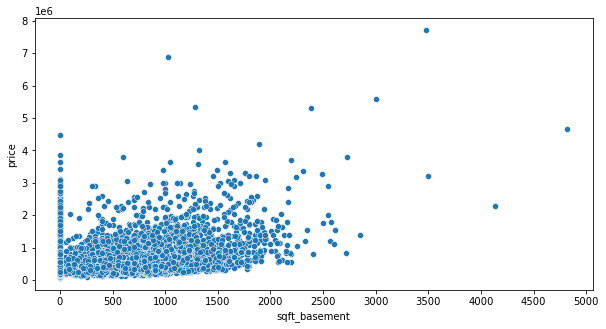

In [20]:
#make a quick plot showing the relationship between sqft_basement and price

plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_kch, x="sqft_basement", y="price")
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]);

There isn't a very strong linear relationship between sqft_basement and price. It toes the line with one of the assumptions of Linear Regression; so is this value even worth to have in the final model? Also you can a see very clear outliers in price some points almost in the 6 million to 8 million range.

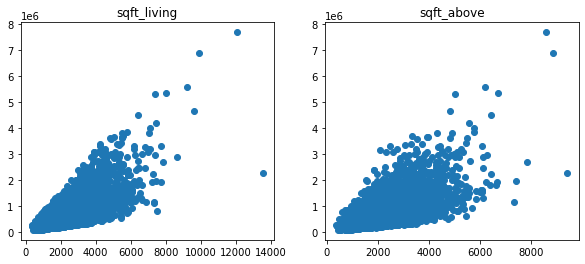

In [21]:
#plotting sqft_above and sqft_living
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(train_kch['sqft_living'], train_kch['price'])
axes[1].scatter(train_kch['sqft_above'], train_kch['price'])

axes[0].set_title("sqft_living")
axes[1].set_title("sqft_above");

There is a stronger linear relationship with sqft_living compared to sqft_above

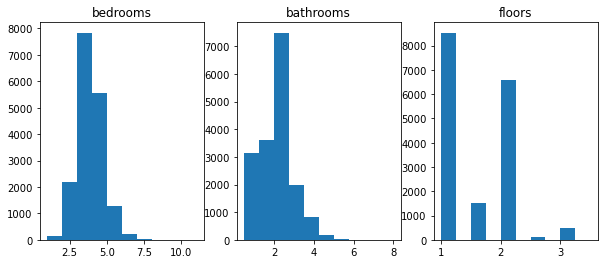

In [22]:
#let's have a look at bedrooms, bathrooms, and floors
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
axes[0].hist(train_kch['bedrooms'])
axes[1].hist(train_kch['bathrooms'])
axes[2].hist(train_kch['floors'])

axes[0].set_title("bedrooms")
axes[1].set_title("bathrooms")
axes[2].set_title("floors");

- Bedroons values seem to be between 1 and 8 
- Bathrooms between 1 and 5 almost 6
- Floors between 1 and 3

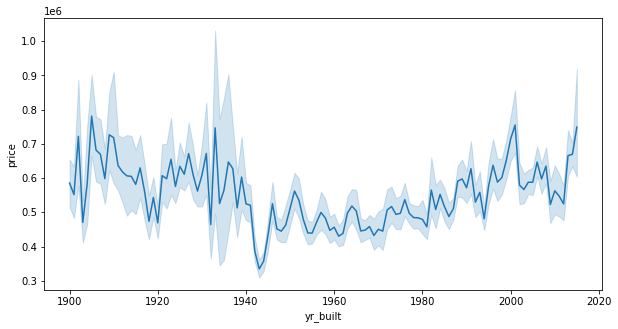

In [23]:
#yr_built
plt.figure(figsize=(10, 5))
sns.lineplot(data=train_kch, x='yr_built', y='price');

The price fluctuates a lot but it reached its peak around the 1910s.

In [24]:
#looking at the statistics for numerical values 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
train_kch.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,price
count,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000
mean,3.37489,2.11456,2083.49829,14989.62864,1.49499,1790.33721,287.59912,1970.96527,98078.00064,541519.00943
std,0.90440,0.76768,917.55102,40198.03183,0.54094,825.99428,441.33459,29.35621,53.52185,368968.72676
min,1.00000,0.50000,370.00000,520.00000,1.00000,370.00000,0.00000,1900.00000,98001.00000,78000.00000
25%,3.00000,1.75000,1430.00000,5060.00000,1.00000,1200.00000,0.00000,1952.00000,98033.00000,324000.00000
50%,3.00000,2.25000,1920.00000,7609.00000,1.50000,1570.00000,0.00000,1975.00000,98065.00000,450000.00000
75%,4.00000,2.50000,2550.00000,10720.00000,2.00000,2220.00000,550.00000,1997.00000,98117.00000,645500.00000
max,11.00000,8.00000,13540.00000,1651359.00000,3.50000,9410.00000,4820.00000,2015.00000,98199.00000,7700000.00000


- The median for bedrooms are 3, and the bathrooms are 2.25
- The median for floor is 1.5 
- The median yr_built is 1975 
- The max value for price is 7.7 million dollars with the 75% of the data falling between 645,500 thousands, which is a massive outlier - have to handle that

-----------
### Feature Engineering - creating maps for the categorical variables condition, floors, zipcode

- Condition: How good the overall condition of the house is. Related to maintenance of house.
- Grade: Overall grade of the house. Related to the construction and design of the house.

In [25]:
#creating a map for condition since there are low values of Poor and Fair compared to the other categorical variables
condition_map = {'Poor': 0,
                 'Fair': 1,
                 'Average': 2,
                 'Good': 3,
                 'Very Good': 4,
                }

#adding to train_kch
train_kch['cond_num'] = train_kch['condition'].map(condition_map)
train_kch.drop('condition', axis = 1, inplace=True);

In [26]:
#mapping grade map
grade_map = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}

#adding in to train_kch
train_kch['grade_num'] = train_kch['grade'].map(grade_map)
train_kch.drop('grade', axis = 1, inplace=True);

In [27]:
#creating map for zipcodes
zip_map = {
    98001:'Suburbs', 98002:'Suburbs', 98003:'Suburbs', 98004:'Suburbs', 98005:'Suburbs',
    98006:'Suburbs', 98007:'Suburbs',98008:'Suburbs', 98010:'Rural', 98011:'Suburbs', 
    98014:'Rural', 98019:'Rural', 98022:'Rural', 98023:'Suburbs', 98024:'Rural', 
    98027:'Rural', 98028:'Suburbs', 98029:'Suburbs', 98030:'Suburbs', 98031:'Suburbs',
    98032:'Suburbs', 98033:'Suburbs', 98034:'Suburbs', 98038:'Rural', 98039:'Suburbs',
    98040:'Suburbs', 98042:'Rural', 98045:'Rural', 98052:'Suburbs', 98053:'Rural',
    98055:'Suburbs', 98056:'Suburbs', 98058:'Suburbs', 98059:'Suburbs', 98065:'Rural',
    98070:'Suburbs', 98072:'Suburbs', 98074:'Suburbs', 98075:'Suburbs', 98077:'Rural',
    98092:'Suburbs', 98102:'Seattle', 98103:'Seattle', 98105:'Seattle', 98106:'Seattle',
    98107:'Seattle', 98108:'Seattle', 98109:'Seattle', 98112:'Seattle', 98115:'Seattle', 
    98116:'Seattle', 98117:'Seattle', 98118:'Seattle', 98119:'Seattle', 98122:'Seattle',
    98125:'Seattle', 98126:'Seattle', 98133:'Seattle', 98136:'Seattle', 98144:'Seattle', 
    98146:'Seattle', 98148:'Seattle', 98155:'Seattle', 98166:'Seattle', 98168:'Seattle',
    98177:'Seattle', 98178:'Seattle', 98188:'Seattle', 98198:'Seattle', 98199:'Seattle'
    }


#adding in to train_kch
train_kch['zones'] = train_kch['zipcode'].map(zip_map)
train_kch.drop('zipcode', axis = 1, inplace=True);

#sanity check
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,cond_num,grade_num,zones
6243,2014-12-22,4,2.00000,1440,4855,2.00000,1440,0.00000,1972,332500.00000,3,7,Seattle
8986,2015-05-12,3,1.75000,1430,9857,1.00000,1140,290.00000,1980,390000.00000,3,7,Rural
9419,2014-12-29,4,2.75000,3120,5000,2.00000,3120,0.00000,2010,800000.00000,2,9,Suburbs
10155,2015-03-21,4,2.50000,2060,6958,1.00000,1220,840.00000,1974,462000.00000,2,7,Suburbs
10436,2014-07-01,3,2.00000,2500,4080,1.50000,1680,820.00000,1922,695000.00000,4,7,Seattle


### Outlier Handling

From the above graphs we could see that there were some outliers in price with 75% of the data equal to 650K while the max was 7.7million. Could do this by z-score or IQR range threshold

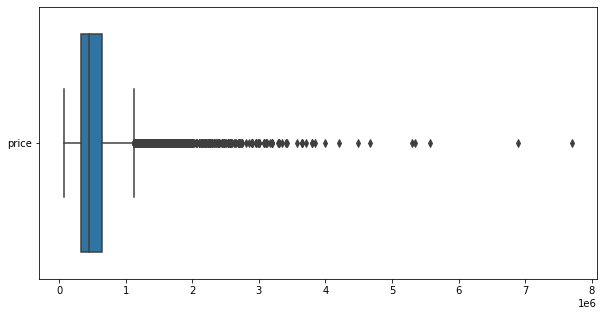

In [28]:
#boxplot of price
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_kch[["price"]], orient="h");

From the boxplot can see that their is alot of outliers

In [29]:
#finding the zscore for the price column and adding it to the train_kch
train_kch['zscore_price'] = (train_kch['price'] - train_kch['price'].mean())/train_kch['price'].std()
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,cond_num,grade_num,zones,zscore_price
6243,2014-12-22,4,2.00000,1440,4855,2.00000,1440,0.00000,1972,332500.00000,3,7,Seattle,-0.56650
8986,2015-05-12,3,1.75000,1430,9857,1.00000,1140,290.00000,1980,390000.00000,3,7,Rural,-0.41066
9419,2014-12-29,4,2.75000,3120,5000,2.00000,3120,0.00000,2010,800000.00000,2,9,Suburbs,0.70055
10155,2015-03-21,4,2.50000,2060,6958,1.00000,1220,840.00000,1974,462000.00000,2,7,Suburbs,-0.21552
10436,2014-07-01,3,2.00000,2500,4080,1.50000,1680,820.00000,1922,695000.00000,4,7,Seattle,0.41597


In [30]:
#storing those outliers in a new dataset
outliers = train_kch[(train_kch['zscore_price']<-3) | (train_kch['zscore_price']>3)]
outliers.shape

(330, 14)

In [31]:
#removing those outliers from train_kch
train_kch = train_kch[(train_kch['zscore_price']>-3) & (train_kch['zscore_price']<3)]
print(train_kch.shape)
train_kch.head()

(16947, 14)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,cond_num,grade_num,zones,zscore_price
6243,2014-12-22,4,2.00000,1440,4855,2.00000,1440,0.00000,1972,332500.00000,3,7,Seattle,-0.56650
8986,2015-05-12,3,1.75000,1430,9857,1.00000,1140,290.00000,1980,390000.00000,3,7,Rural,-0.41066
9419,2014-12-29,4,2.75000,3120,5000,2.00000,3120,0.00000,2010,800000.00000,2,9,Suburbs,0.70055
10155,2015-03-21,4,2.50000,2060,6958,1.00000,1220,840.00000,1974,462000.00000,2,7,Suburbs,-0.21552
10436,2014-07-01,3,2.00000,2500,4080,1.50000,1680,820.00000,1922,695000.00000,4,7,Seattle,0.41597


In [32]:
#can remove zscore_price since not needed anymore
train_kch.drop('zscore_price', axis=1, inplace=True)
train_kch.shape

(16947, 13)

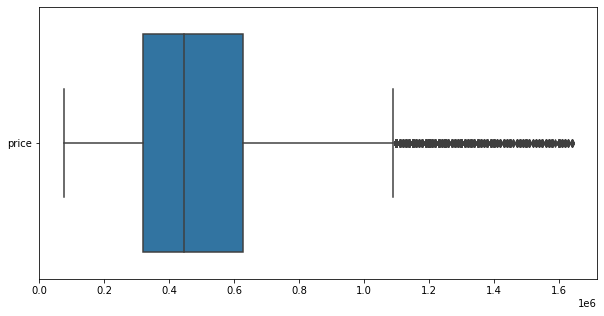

In [33]:
#boxplot for price once again
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_kch[["price"]], orient="h");

-----------------
### Visualization of Categorical Variables

Now that the price outliers have been trimmed/removed can look at the categorical variables like condition_num, grade_num, zones and compare them with the price median & mean  

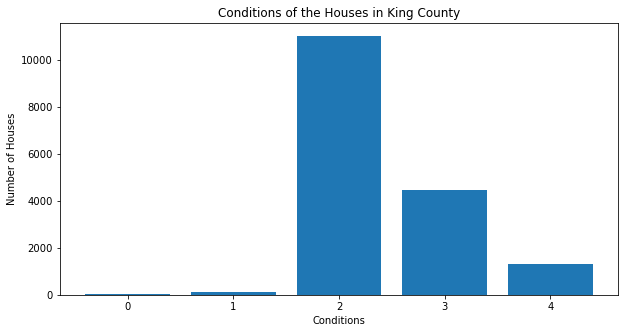

In [34]:
#creating a list of the cond_num values and count
cond_num_value = list(train_kch['cond_num'].value_counts().index)
con_num_count = list(train_kch['cond_num'].value_counts().values)

#plotting cond_num
fig, ax = plt.subplots(figsize=(10, 5))
x_labels = ['Poor','Fair', 'Average', 'Good','Very Good']

ax.bar(cond_num_value, con_num_count)
ax.set_xlabel("Conditions")
ax.set_ylabel("Number of Houses")
ax.set_title("Conditions of the Houses in King County");
#ax.set_xticks(x_labels)
#labels = ['Poor','Fair', 'Average', 'Good','Very Good']
#plt.xticks(cond_num_value, labels);

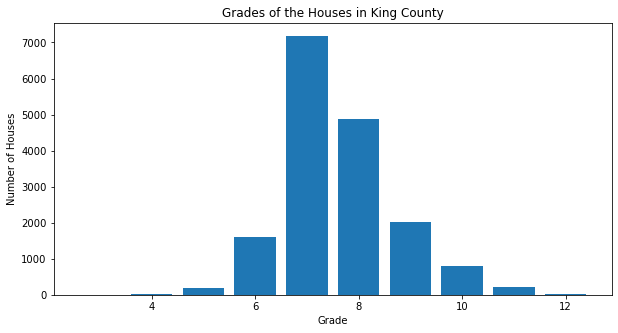

In [35]:
#creating a list of the grade_num values and count
grade_num_value = list(train_kch['grade_num'].value_counts().index)
grade_num_count = list(train_kch['grade_num'].value_counts().values)


#plotting grade_num
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(grade_num_value, grade_num_count)
ax.set_xlabel("Grade")
ax.set_ylabel("Number of Houses")
ax.set_title("Grades of the Houses in King County");
#labels = ['Poor', 'Fair', 'Better','Very Good','Excellent','Good','Better','Very Good','Excellent','Luxury']
#plt.xticks(grade_num_value, labels);

-------------------------
## Doing the same thing for test data

In [36]:
#null-value check
test_kch.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
price            0
dtype: int64

In [37]:
#test_kch = test_kch.dropna().reset_index(drop=True)

In [38]:
#replacing ? with 0.0
test_kch['sqft_basement'] = test_kch['sqft_basement'].str.replace('?', '0.0')

#changing its dtype from object to float
test_kch['sqft_basement'] = test_kch['sqft_basement'].astype(float)

In [39]:
#condition mapping
test_kch['cond_num'] = test_kch['condition'].map(condition_map)
test_kch.drop('condition', axis = 1, inplace=True);

#grade mapping
test_kch['grade_num'] = test_kch['grade'].map(grade_map)
test_kch.drop('grade', axis = 1, inplace=True);

#zipcode mapping
test_kch['zones'] = test_kch['zipcode'].map(zip_map)
test_kch.drop('zipcode', axis = 1, inplace=True);

#sanity check
test_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,cond_num,grade_num,zones
3686,2015-02-20,3,0.75000,850,8573,1.00000,600,250.00000,1945,132500.00000,2,6,Seattle
10247,2014-10-08,3,1.00000,1510,6083,1.00000,860,650.00000,1940,415000.00000,3,6,Seattle
4037,2015-03-25,4,2.25000,1790,42000,1.00000,1170,620.00000,1983,494000.00000,2,7,Rural
3437,2015-02-17,2,1.50000,1140,2500,1.00000,630,510.00000,1988,355000.00000,2,7,Seattle
19291,2014-05-23,3,1.00000,1500,3920,1.00000,1000,500.00000,1947,606000.00000,2,7,Seattle


--------------------------------
## OrdinalEncoder & OneHotEncoder - categorical variables cond_num, grade_num, zones

Can do OrdinalEncoder directly on condition and grade but might be better to bin them since there are a fair amount of unique values for both which could cause multicollinearlity. 

For condition:
- Poor 
- Fair
- Average
- Good 
- Very Good

For grade:
- 7 Average
- 8 Good
- 9 Better
- 6 Low Average
- 10 Very Good
- 11 Excellent
- 5 Fair
- 12 Luxury
- 4 Low
- 3 Poor

Can categorize condition values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Poor</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>2</td>
  </tr>
 <tr>
    <td>Good</td>
    <td>3</td>
  </tr> 
 <tr>
    <td>Very Good</td>
    <td>4</td>
  </tr>
</table>


Can categorize grade values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Poor</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Low</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Low Average</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>7</td>
  </tr>
 <tr>
    <td>Good</td>
    <td>8</td>
  </tr> 
 <tr>
    <td>Better</td>
    <td>9</td>
 </tr>
 <tr>
    <td>Very Good</td>
    <td>10</td>
  </tr>
 <tr>
    <td>Excellent</td>
    <td>11</td>
  </tr>
 <tr>
    <td>Luxury</td>
    <td>12</td>
  </tr>
</table>

In [40]:
#Creating variables storing our Ordinal & One Hot Encoding columns
train_kch_cat = train_kch[['cond_num', 'grade_num']]
train_kch_zones = train_kch[['zones']] 
test_kch_cat = test_kch[['cond_num', 'grade_num']]
test_kch_zones = test_kch[['zones']]

#Initializing Ordinal and One Hot
ore = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=12)
ore.fit(train_kch_cat)
ohe = OneHotEncoder()
ohe.fit(train_kch_zones)


#Applying Ordinal and One Hot to our Train and Test
ohe_transform = ohe.transform(train_kch_zones)
zones_encoded = pd.DataFrame(ohe_transform, columns =['zones'], 
                           index= train_kch_zones.index)

ohe_test_transform = ohe.transform(test_kch_zones)
zones_encoded_test = pd.DataFrame(ohe_test_transform, columns =['zones'],
                          index= test_kch_zones.index)

ore_transform = ore.transform(train_kch_cat)
cat_encoded = pd.DataFrame(ore_transform, columns = ['cond_num_cat','grade_num_cat'], 
                          index=train_kch_cat.index)

ore_test_transform = ore.transform(test_kch_cat)
cat_encoded_test = pd.DataFrame(ore_test_transform, columns = ['cond_num_cat','grade_num_cat'], 
                          index=test_kch_cat.index)

In [52]:
zones_encoded

,zones
6243,"(0, 1)\t1.0"
8986,"(0, 0)\t1.0"
9419,"(0, 2)\t1.0"
10155,"(0, 2)\t1.0"
10436,"(0, 1)\t1.0"
...,...
11964,"(0, 0)\t1.0"
21575,"(0, 1)\t1.0"
5390,"(0, 0)\t1.0"
860,"(0, 1)\t1.0"


Now have the categorical variables encoding that can be used for the model.

---------------

## Standardized Scaler - numerical variables Train and test data

In [41]:
#standard scaling the numerical values dropping categorical and target 
#training data
X_train_kch_nums = train_kch.drop(['cond_num', 'grade_num', 
                                   'zones','date', 'price'], axis=1)
y_train_kch = train_kch['price']

#testing data
X_test_kch_nums = test_kch.drop(['cond_num','grade_num', 
                                'zones','date', 'price'], axis=1)
y_test_kch = test_kch['price']

#Standardized Scaler - fit to training x
ss = StandardScaler().fit(X_train_kch_nums)

#training data - transform
X_train_scaled = pd.DataFrame(ss.transform(X_train_kch_nums), columns=X_train_kch_nums.columns, index=X_train_kch_nums.index)

#testing data - transform
X_test_scaled = pd.DataFrame(ss.transform(X_test_kch_nums), columns=X_test_kch_nums.columns, index=X_test_kch_nums.index)

In [42]:
train_kch = pd.concat([X_train_scaled, cat_encoded, zones_encoded, y_train_kch],axis=1)
train_kch

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,cond_num_cat,grade_num_cat,zones,price
6243,0.71843,-0.11641,-0.71252,-0.25049,0.95046,-0.40604,-0.65310,0.03765,3.00000,4.00000,"(0, 1)\t1.0",332500.00000
8986,-0.39928,-0.45755,-0.72449,-0.12370,-0.90396,-0.79513,0.03253,0.31098,3.00000,4.00000,"(0, 0)\t1.0",390000.00000
9419,0.71843,0.90701,1.29949,-0.24682,0.95046,1.77289,-0.65310,1.33599,2.00000,6.00000,"(0, 2)\t1.0",800000.00000
10155,0.71843,0.56587,0.03001,-0.19719,-0.90396,-0.69137,1.33286,0.10598,2.00000,4.00000,"(0, 2)\t1.0",462000.00000
10436,-0.39928,-0.11641,0.55697,-0.27014,0.02325,-0.09476,1.28557,-1.67070,4.00000,4.00000,"(0, 1)\t1.0",695000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.39928,0.56587,0.23361,-0.22654,0.95046,0.61858,-0.65310,1.13099,2.00000,4.00000,"(0, 0)\t1.0",440000.00000
21575,0.71843,0.90701,0.88032,-0.27592,0.95046,1.31894,-0.65310,1.47266,2.00000,5.00000,"(0, 1)\t1.0",572000.00000
5390,0.71843,-0.79869,-0.60473,-0.14543,-0.90396,-0.28931,-0.65310,0.17432,3.00000,3.00000,"(0, 0)\t1.0",299800.00000
860,-2.63471,-1.82211,-1.98200,0.00666,-0.90396,-1.78083,-0.65310,-0.26985,2.00000,2.00000,"(0, 1)\t1.0",245000.00000


In [43]:
test_kch = pd.concat([X_test_scaled, cat_encoded_test, zones_encoded_test, y_test_kch],axis=1)
test_kch

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,cond_num_cat,grade_num_cat,zones,price
3686,-0.39928,-1.82211,-1.41912,-0.15625,-0.90396,-1.49550,-0.06204,-0.88486,2.00000,3.00000,"(0, 1)\t1.0",132500.00000
10247,-0.39928,-1.48097,-0.62868,-0.21937,-0.90396,-1.15828,0.88365,-1.05570,3.00000,3.00000,"(0, 1)\t1.0",415000.00000
4037,0.71843,0.22473,-0.29335,0.69107,-0.90396,-0.75622,0.81273,0.41349,2.00000,4.00000,"(0, 0)\t1.0",494000.00000
3437,-1.51700,-0.79869,-1.07181,-0.31019,-0.90396,-1.45659,0.55266,0.58432,2.00000,4.00000,"(0, 1)\t1.0",355000.00000
19291,-0.39928,-1.48097,-0.64066,-0.27420,-0.90396,-0.97671,0.52902,-0.81653,2.00000,4.00000,"(0, 1)\t1.0",606000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2522,-1.51700,-1.48097,-1.21552,-0.24352,-0.90396,-0.95077,-0.65310,-0.78236,3.00000,3.00000,"(0, 2)\t1.0",175000.00000
11119,-0.39928,0.56587,0.01803,-0.16641,0.95046,0.38512,-0.65310,1.06266,2.00000,5.00000,"(0, 1)\t1.0",394950.00000
11973,1.83615,-0.11641,0.10187,3.11348,0.02325,0.47591,-0.65310,-1.97820,2.00000,4.00000,"(0, 2)\t1.0",437000.00000
17601,-0.39928,0.56587,-0.05382,-0.18150,0.95046,0.30730,-0.65310,0.65265,2.00000,4.00000,"(0, 2)\t1.0",293000.00000


-----------------

## Creating a Pairplot and a Corr Heatmap to see which features are best for the model

<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.


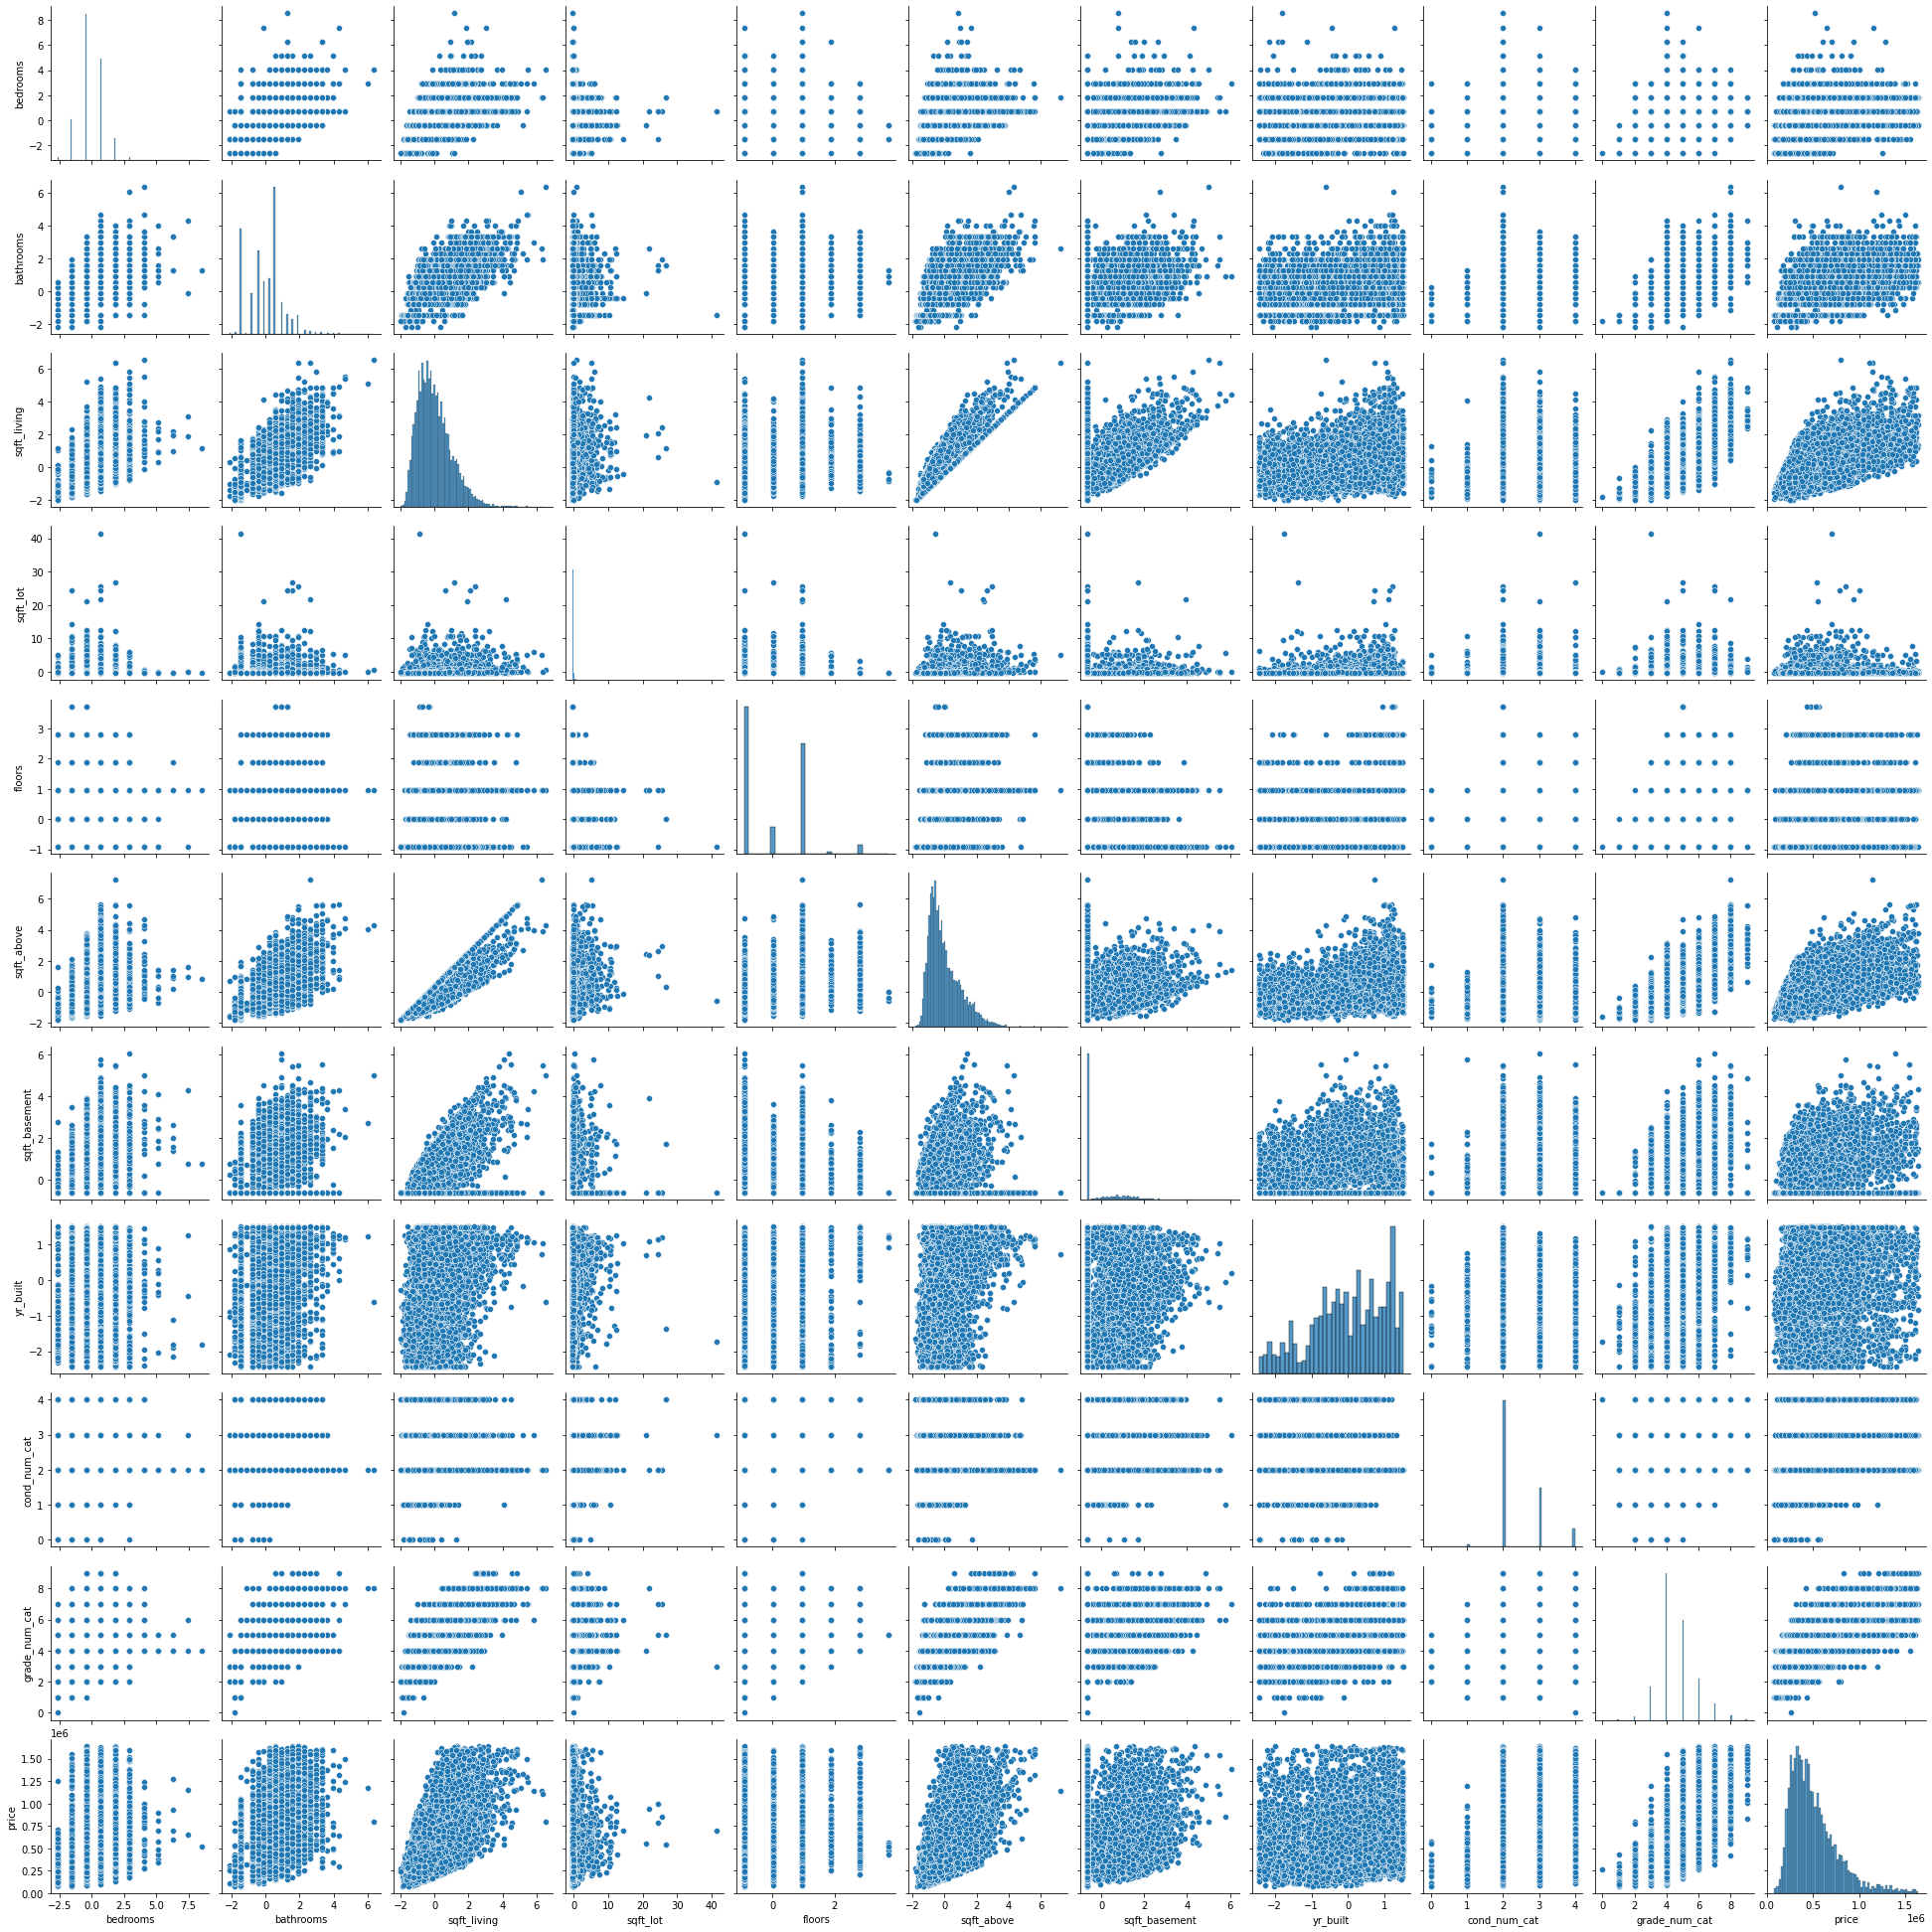

In [44]:
#pairplot
#to be able to understand the pairplot better
sns.pairplot(train_kch)
plt.show()

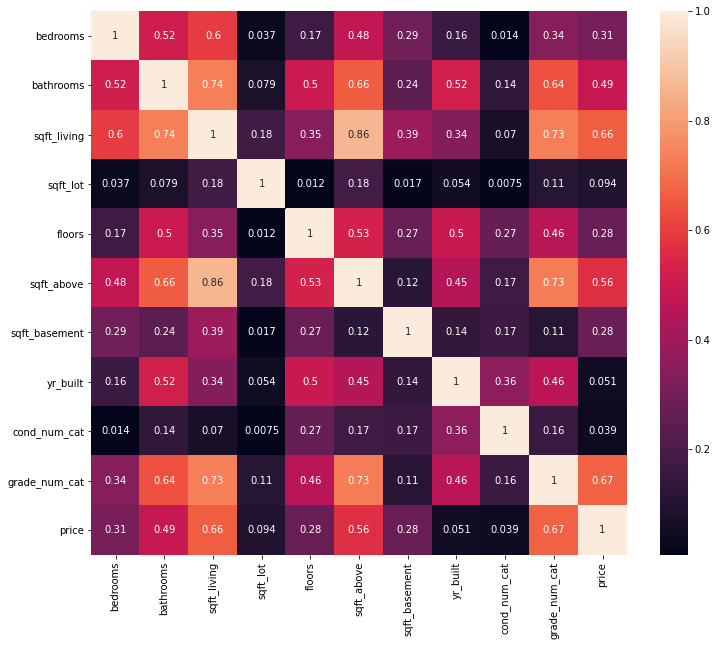

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(train_kch.corr().abs(), annot=True)
plt.show()

In [46]:
price_corr = train_kch.corr()['price']
price_corr.abs().sort_values(ascending=False)[1:]

grade_num_cat   0.67056
sqft_living     0.66333
sqft_above      0.56401
bathrooms       0.49425
bedrooms        0.31369
floors          0.27808
sqft_basement   0.27545
sqft_lot        0.09378
yr_built        0.05132
cond_num_cat    0.03934
Name: price, dtype: float64

-----------------

## Modeling - Dummy Regressor, Simple Linear, Multi Linear

In [47]:
#begining with the Dummy Regressor - the mean of y: price
from sklearn.dummy import DummyRegressor 

#defining X and y for train_kch
X_train_kch = train_kch['sqft_living']
y_train_kch = train_kch['price']

#defining X and y for test_kch
X_test_kch = test_kch['sqft_living']
y_test_kch = test_kch['price']

dummy_mean = DummyRegressor(strategy='mean').fit(X_train_kch, y_train_kch)
y_predict_dummy_mean = dummy_mean.predict(X_test_kch)

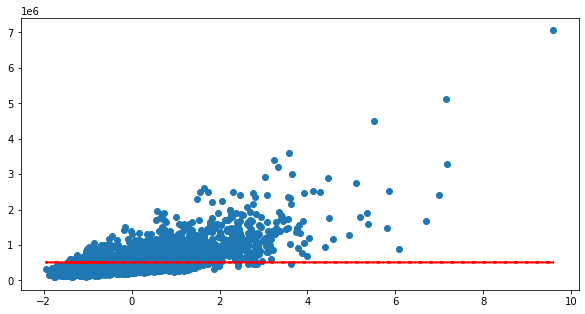

In [48]:
#plotting the Dummy Regressor mean and predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test_kch, y_test_kch)
plt.plot(X_test_kch, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy');

In [49]:
dummy_regr = DummyRegressor(strategy = 'mean')
dummy_regr.fit(X_train_kch, y_train_kch)
dummy_regr.predict(X_train_kch)
dummy_regr.predict(X_test_kch)
dummy_regr.score(X_train_kch, y_train_kch)
dummy_regr.score(X_test_kch, y_test_kch)
dummy_train_RMSE = MSE(y_train_kch, dummy_regr.predict(X_train_kch),squared = False)
dummy_test_RMSE = MSE(y_test_kch, dummy_regr.predict(X_test_kch), squared = False)

print()
print(f'Baseline Model Train Score: {dummy_regr.score(X_train_kch, y_train_kch)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test_kch, y_test_kch)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')


Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 259637.0

Baseline Model Test Score: -0.005965155057880089
Baseline Model Test RMSE: 361930.0


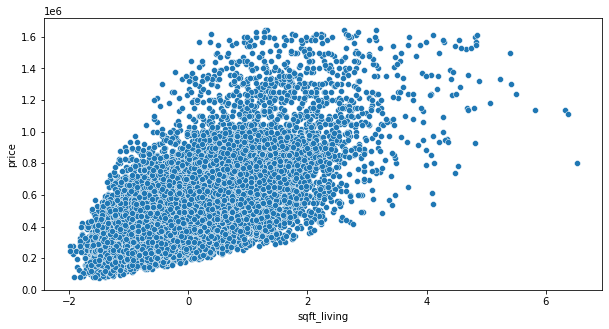

In [50]:
# simple Linear Regression Model with sqft_living 

#plotting sqft_living to see if it has a linear relationship with price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_kch, x="sqft_living", y="price");

The linear relationship between the two is not particularly strong but it will do.

In [51]:
X_train_simple = train_kch[['sqft_living']]
X_test_simple = test_kch[['sqft_living']]

#LinearRegression
simple_model = LinearRegression()
simple_model.fit(X_train_simple,y_train_kch)

#predicting the data
simple_predict_train = simple_model.predict(X_train_simple)
simple_predict_test = simple_model.predict(X_test_simple)

#getting the scores
simple_model_score_train = simple_model.score(X_train_simple, y_train_kch)
simple_model_score_test = simple_model.score(X_test_simple, y_test_kch)

#Root mean squared error
simple_train_RMSE = MSE(y_train_kch, simple_predict_train, squared = False)
simple_test_RMSE = MSE(y_test_kch, simple_predict_test, squared = False)


print(f'Simple Model (Square feet living) Train score: {simple_model_score_train}')
print(f'Simple Model Train RMSE: {round(simple_train_RMSE)}')
print()
print(f'Simple Model (Square feet living) Test score:{simple_model_score_test}')
print(f'Simple Model Test RMSE: {round(simple_test_RMSE)}')


Simple Model (Square feet living) Train score: 0.4400058368806469
Simple Model Train RMSE: 194293.0

Simple Model (Square feet living) Test score:0.4590160691292965
Simple Model Test RMSE: 265415.0
